In [9]:
#loading the dependencies
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import roc_curve,precision_score,f1_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
data = datasets.load_breast_cancer()

In [11]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [13]:
#various features names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
#output classes
data.target_names


array(['malignant', 'benign'], dtype='<U9')

In [15]:
#getting features and labels
x,y = data.data,data.target

In [16]:
#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [17]:
#calling the estimator
GBC = GradientBoostingClassifier()

In [19]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [20]:
#predictions
prediction = GBC.predict(x_test)

In [21]:
prediction[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
y_test[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
#confusion matrix
confusion_matrix(y_test,prediction)

array([[45,  2],
       [ 3, 64]], dtype=int64)

In [24]:
#accuracy
GBC.score(x_test,y_test)

0.956140350877193

In [25]:
#precision
precision_score(y_test,prediction)

0.9696969696969697

In [26]:
y_pred_prob = GBC.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

Text(0, 0.5, 'True Positive Rate')

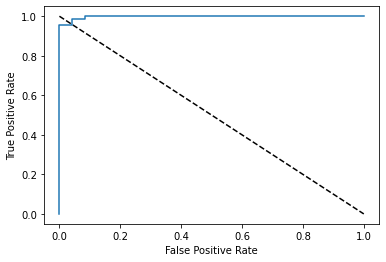

In [27]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = "GradientBoostingClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [28]:
#calling the adaboost estimator
adaboost = AdaBoostClassifier()

In [29]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier()

In [30]:
prediction = adaboost.predict(x_test)

In [31]:
prediction[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
x_test[0:10]

array([[1.340e+01, 2.052e+01, 8.864e+01, 5.567e+02, 1.106e-01, 1.469e-01,
        1.445e-01, 8.172e-02, 2.116e-01, 7.325e-02, 3.906e-01, 9.306e-01,
        3.093e+00, 3.367e+01, 5.414e-03, 2.265e-02, 3.452e-02, 1.334e-02,
        1.705e-02, 4.005e-03, 1.641e+01, 2.966e+01, 1.133e+02, 8.444e+02,
        1.574e-01, 3.856e-01, 5.106e-01, 2.051e-01, 3.585e-01, 1.109e-01],
       [1.321e+01, 2.525e+01, 8.410e+01, 5.379e+02, 8.791e-02, 5.205e-02,
        2.772e-02, 2.068e-02, 1.619e-01, 5.584e-02, 2.084e-01, 1.350e+00,
        1.314e+00, 1.758e+01, 5.768e-03, 8.082e-03, 1.510e-02, 6.451e-03,
        1.347e-02, 1.828e-03, 1.435e+01, 3.423e+01, 9.129e+01, 6.329e+02,
        1.289e-01, 1.063e-01, 1.390e-01, 6.005e-02, 2.444e-01, 6.788e-02],
       [1.402e+01, 1.566e+01, 8.959e+01, 6.065e+02, 7.966e-02, 5.581e-02,
        2.087e-02, 2.652e-02, 1.589e-01, 5.586e-02, 2.142e-01, 6.549e-01,
        1.606e+00, 1.925e+01, 4.837e-03, 9.238e-03, 9.213e-03, 1.076e-02,
        1.171e-02, 2.104e-03, 1.491e